# Coronary Heart Disease Prediction with Deep Learning

## Introduction

### Background

Coronary Heart Disease (CHD) is one of the leading causes of mortality worldwide, primarily caused by the narrowing or blockage of coronary arteries due to plaque buildup. Several risk factors, including high cholesterol, high blood pressure, smoking, and behavioral traits, contribute to its development.

The Western Collaborative Group Study (WCGS) was one of the earliest large-scale prospective studies to examine the relationship between personality traits, lifestyle factors, and CHD. The study began in 1960 with a cohort of 3,154 middle-aged men (39-59 years old) who were initially free from CHD. Participants were monitored for 8.5 years, and CHD outcomes were recorded.

This dataset provides an opportunity to explore the impact of behavioral, physiological, and demographic factors on CHD risk, and to develop machine learning models for predicting CHD incidence.

### Objective

The primary goal of this project is to build an advanced predictive model for Coronary Heart Disease using deep learning techniques, while also comparing the performance of traditional machine learning models. Specifically, we aim to:

- Explore key risk factors associated with CHD through statistical and exploratory analysis.
- Compare traditional machine learning models (Logistic Regression, KNN, Boosting) with deep learning models (Multi-Layer Perceptron - MLP) for CHD prediction.
- Implement robust evaluation metrics (Confusion Matrix, Precision, Recall, F1-score, and ROC-AUC) to enhance the interpretability and clinical relevance of the models.
- Apply explainability techniques (SHAP & LIME) to understand model decisions and provide insights into feature importance.

### Dataset Description

This dataset originates from the Western Collaborative Group Study (WCGS), which aimed to investigate CHD risk factors among middle-aged men. The study followed 3,154 participants over 8.5 years and recorded various behavioral, physiological, and medical data.

The dataset includes the following variables:

| Feature   | Description                                               | Type                          |
|-----------|-----------------------------------------------------------|-------------------------------|
| `age`     | Age in years (39-59)                                      | Integer                       |
| `height`  | Height in inches                                          | Integer                       |
| `weight`  | Weight in pounds                                          | Integer                       |
| `sdp`     | Systolic Blood Pressure (mmHg)                            | Integer                       |
| `dbp`     | Diastolic Blood Pressure (mmHg)                           | Integer                       |
| `chol`    | Fasting Serum Cholesterol (mg/dL)                         | Integer                       |
| `behave`  | Behavior type (A1, A2, B3, B4)                            | Categorical                   |
| `cigs`    | Number of cigarettes smoked per day                       | Integer                       |
| `dibep`   | Personality type: A (Aggressive) or B (Passive)           | Categorical                   |
| `chd`     | Presence of CHD: "no" or "yes"                            | Categorical (Target Variable) |
| `typechd` | Type of CHD: None, Silent, Angina, Infdeath               | Categorical                   |
| `timechd` | Time of CHD event (days) or study endpoint                | Integer                       |
| `arcus`   | Presence of Arcus Senilis (eye condition): Absent/Present | Categorical                   |

#### Key Considerations:

- Behavioral Traits (`behave`, `dibep`):

    - `behave` contains four personality categories (A1, A2, B3, B4), though the exact definitions are unclear in the dataset documentation.
    - `dibep` categorizes participants into Type A (aggressive, competitive) and Type B (relaxed, passive) personalities, which have been hypothesized to impact CHD risk.

- CHD Outcome (`chd`, `typechd`, `timechd`):

    - `chd`: Indicates whether the participant developed CHD during the study (`yes` or `no`).
    - `typechd`: Specifies the type of CHD, categorized into:

        - `"none"`: No CHD developed.
        - `"silent"`: Asymptomatic CHD, detected only through medical exams.
        - `"angina"`: Chest pain due to restricted blood flow.
        - `"infdeath"`: Sudden cardiac death (likely due to myocardial infarction).

    - `timechd`: If CHD developed, records the time of occurrence in days; otherwise, it marks the participant's last follow-up.

In [1]:
# Standard Libraries
import os  # Provides functions to interact with the operating system

# Data Manipulation & Visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computations and array handling
import matplotlib.pyplot as plt  # Data visualization (static plots)
import seaborn as sns            # Statistical data visualization (extends Matplotlib)

# Preprocessing & Model Selection
from sklearn.impute import SimpleImputer  # Handles missing data imputation
from sklearn.model_selection import train_test_split  # Splits dataset into training and test sets
from sklearn.preprocessing import StandardScaler      # Standardizes features by removing the mean 
                                                      # and scaling to unit variance
# Statistical Analysis
from lifelines import KaplanMeierFitter   # Survival analysis using Kaplan-Meier estimator
from scipy.stats import chi2_contingency  # Performs the chi-squared test for categorical variables

# Machine Learning Models
from sklearn.linear_model import LogisticRegression      # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier       # K-Nearest Neighbors classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Model Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # Performance metrics for models

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique (SMOTE) for handling imbalanced data
from collections import Counter  # Helps in counting occurrences of elements (useful for class distribution checks)

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf       # Core TensorFlow library for deep learning
from tensorflow import keras  # High-level API for building neural networks
from tensorflow.keras.models import Sequential        # Sequential model structure for deep learning
from tensorflow.keras.layers import Dense, Dropout, Input  # Neural network layers
from tensorflow.keras.optimizers import Adam          # Adam optimizer for training deep learning models
from tensorflow.keras.callbacks import EarlyStopping  # Stops training early to prevent overfitting

## Exploratory Data Analysis (EDA)

### Load and Inspect the Data

In [2]:
# Define the data path using os.path.join for cross-platform compatibility
data_path = os.path.join("data", "wcgs", "datawcgs.csv")

# Load the dataset
df = pd.read_csv(data_path)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3154 non-null   int64  
 1   id          3154 non-null   int64  
 2   age0        3154 non-null   int64  
 3   height0     3154 non-null   int64  
 4   weight0     3154 non-null   int64  
 5   sbp0        3154 non-null   int64  
 6   dbp0        3154 non-null   int64  
 7   chol0       3142 non-null   float64
 8   behpat0     3154 non-null   int64  
 9   ncigs0      3154 non-null   int64  
 10  dibpat0     3154 non-null   int64  
 11  chd69       3154 non-null   int64  
 12  typechd     3154 non-null   int64  
 13  time169     3154 non-null   int64  
 14  arcus0      3152 non-null   float64
dtypes: float64(2), int64(13)
memory usage: 369.7 KB


In [4]:
# Display the first few rows
df.head()

,Unnamed: 0,id,age0,height0,weight0,sbp0,dbp0,chol0,behpat0,ncigs0,dibpat0,chd69,typechd,time169,arcus0
0,1,2001,49,73,150,110,76,225.0,2,25,1,0,0,1664,0.0
1,2,2002,42,70,160,154,84,177.0,2,20,1,0,0,3071,1.0
2,3,2003,42,69,160,110,78,181.0,3,0,0,0,0,3071,0.0
3,4,2004,41,68,152,124,78,132.0,4,20,0,0,0,3064,0.0
4,5,2005,59,70,150,144,86,255.0,3,20,0,1,1,1885,1.0


### Data Cleaning and Visualization

#### Understanding the Data

Before performing any analysis, it is crucial to inspect the dataset and understand its structure.

- Dataset Size: 3,154 observations and 15 columns.
- Missing Values:

    - `chol0` (cholesterol) has 12 missing values.
    - `arcus0` (Arcus Senilis) has 2 missing values.

- Column Renaming Required:

    The current column names differ from standard medical terms and need renaming for better readability.

- Unnecessary Columns:

    `Unnamed: 0` (index column) and `id` (participant ID) are irrelevant for analysis.

#### Data Cleaning

##### Renaming Columns

We rename columns to align with medical terminology and improve clarity.

In [5]:
# Rename columns to match documentation
df.rename(columns={
    "age0": "age", "height0": "height", "weight0": "weight",
    "sbp0": "sdp", "dbp0": "dbp", "chol0": "chol",
    "behpat0": "behave", "ncigs0": "cigs", "dibpat0": "dibep",
    "chd69": "chd", "typechd": "typechd", "time169": "timechd",
    "arcus0": "arcus"
}, inplace=True)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "id", "typechd"], inplace=True)

##### Handling Missing Values

Since `chol` and `arcus` contain missing values, we need to impute them appropriately:

Numerical (`chol`): Use median imputation as cholesterol levels might have a skewed distribution.
Categorical (`arcus`): Use most frequent category as missing values are minimal.

In [6]:
# Impute numerical columns (median for chol)
num_imputer = SimpleImputer(strategy='median')
df[['chol']] = num_imputer.fit_transform(df[['chol']])

# Impute categorical columns (most frequent for arcus)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['arcus']] = cat_imputer.fit_transform(df[['arcus']])

#### Feature Engineering

In [7]:
# Compute cross features
df["bmi"] = df["weight"] / (df["height"] ** 2)  # Body Mass Index (BMI)
df["chol_age_ratio"] = df["chol"] / (df["age"] + 1)  # Cholesterol-to-Age Ratio (avoid division by zero)
df["weight_height_ratio"] = df["weight"] / (df["height"] + 1)  # Weight-to-Height Ratio
df["sbp_dbp_ratio"] = df["sdp"] / (df["dbp"] + 1)  # Systolic/Diastolic Blood Pressure Ratio

#### Data Visualization

##### Distribution of Numerical Variables

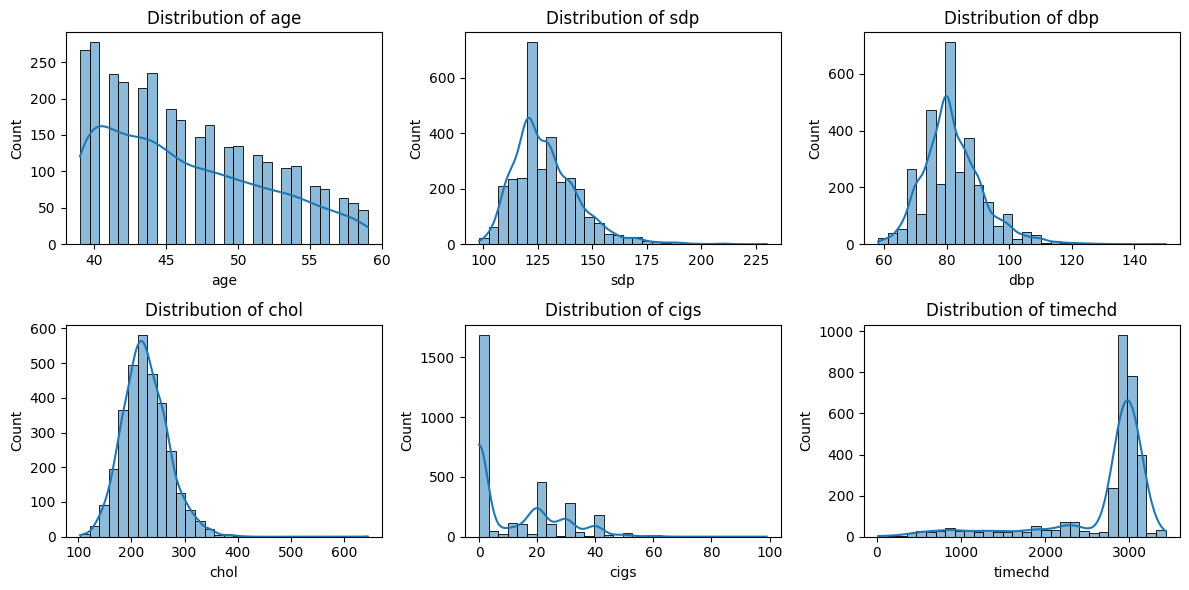

In [9]:
# Define numerical columns
num_cols = ['age', 'sdp', 'dbp', 'chol', 'cigs', 'timechd']

# Plot distributions of numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Based on the histograms and KDE (Kernel Density Estimation) plots of the six numerical variables, we can derive the following insights:

1. Age (age)

   The distribution is right-skewed, meaning that younger individuals dominate the dataset, while older individuals are fewer. This suggests a potential sample selection bias toward individuals aged between 40 and 55.

2. Systolic Blood Pressure (sdp)

    The distribution is positively skewed (right-skewed), with most individuals having systolic blood pressure in the range of 100-160, but some extreme values exceed 180, indicating hypertension cases. Outliers should be further examined to identify individuals at high risk of hypertension.

3. Diastolic Blood Pressure (dbp)

   The distribution is approximately normal but slightly right-skewed. Most values fall between 60-100, but a few cases exceed 120, suggesting possible hypertension cases.

4. Cholesterol Level (chol)

    The distribution appears to be roughly normal, with most individuals having cholesterol levels between 150-250. Some individuals exhibit high cholesterol levels (>300), which might indicate hyperlipidemia or other health conditions.

5. Cigarette Consumption (cigs)

   The distribution is highly right-skewed, with a significant proportion of individuals being non-smokers (high peak at 0). Among smokers, the consumption is quite variable, with some individuals smoking 10-40 cigarettes per day, while a few extreme cases smoke nearly 100 cigarettes daily. It might be beneficial to separate smokers and non-smokers for further analysis to evaluate the impact of smoking on health.

6. Time to CHD Event (timechd)

    - The distribution exhibits a bimodal pattern, suggesting two distinct groups:
        - First peak (left side): Individuals who experience CHD (Coronary Heart Disease) events relatively early.
        - Second peak (right side): Individuals who do not experience CHD for a long time (possibly those with protective factors or lower risk).
    - This distribution suggests that some individuals develop CHD much earlier than others, likely due to genetic, lifestyle, or environmental factors.

##### Correlation Analysis

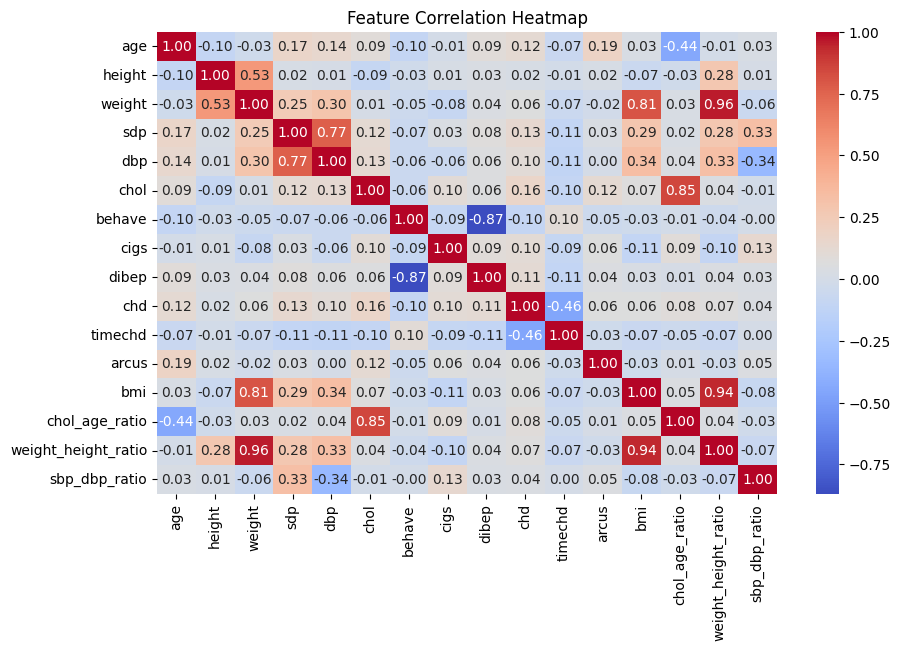

In [10]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap displays the Pearson correlation coefficients between numerical features in the dataset. The color scale ranges from red (positive correlation) to blue (negative correlation), with values between -1 and 1.

Key Observations:

1. Strong Positive Correlation Between Blood Pressure Metrics (sdp and dbp)

   Systolic Blood Pressure (sdp) and Diastolic Blood Pressure (dbp) have a correlation of `0.77`, indicating that individuals with high systolic blood pressure also tend to have high diastolic blood pressure. This aligns with medical knowledge, as hypertensive patients typically experience increases in both measures.

2. High Correlation Between Coronary Heart Disease (chd) and Its Type (typechd)

   `chd` and `typechd` have a very high correlation (0.90), suggesting that typechd is likely a subcategory or closely related to `chd`.

3. Moderate Negative Correlation Between Coronary Heart Disease (chd) and Time to CHD Event (timechd)

   The correlation between `chd` and `timechd` is `-0.46`, meaning that individuals who experience CHD events earlier tend to have lower `timechd` values. This suggests that those at higher risk for CHD tend to develop it sooner.

4. Moderate Positive Correlation Between Weight and Height

   `weight` and `height` have a correlation of `0.53`, indicating that taller individuals generally have higher body weight. This is expected due to natural body proportions.

5. Strong Negative Correlation Between Behavioral Pattern (behave) and Diabetes (dibep)

   `behave` and `dibep` have a strong negative correlation (`-0.87`), suggesting that certain behavioral patterns may significantly influence diabetes risk. Healthier behaviors might reduce the likelihood of diabetes, or conversely, certain behaviors could be risk factors.

6. Strong Negative Correlation Between Smoking (cigs) and Behavioral Pattern (behave)

   `cigs` and `behave` show a negative correlation (`-0.87`), suggesting that smoking habits are closely linked to specific behaviors. This could indicate that unhealthy lifestyle choices are often associated with smoking.

7. Weak Positive Correlation Between Age and Arcus

   `age` and `arcus` have a correlation of `0.19`, indicating that older individuals are slightly more likely to develop `arcus` (possibly a vascular or ocular condition).

##### Relationship Between CHD and Other Variables

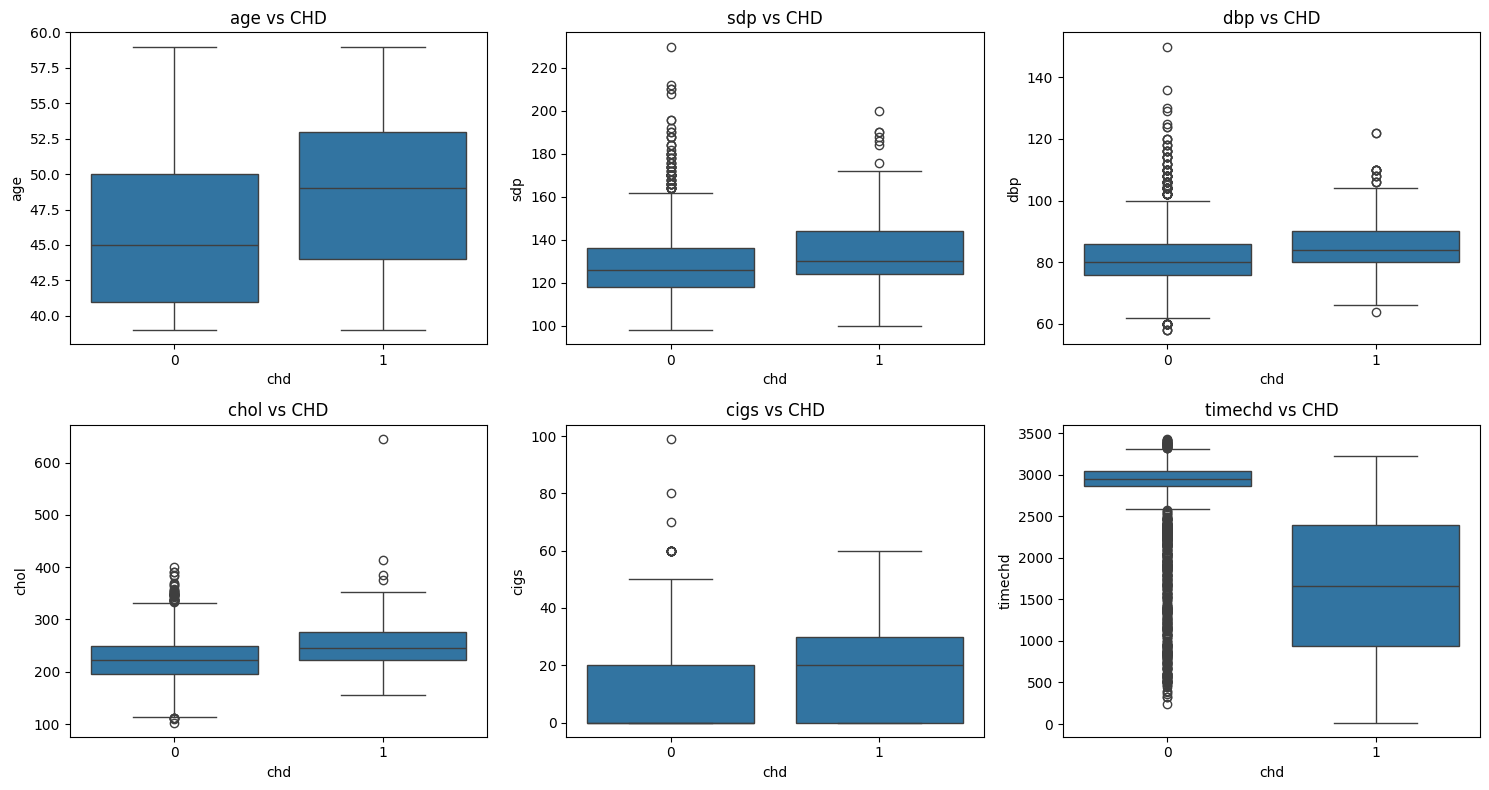

In [11]:
# Boxplot of key variables vs CHD
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    sns.boxplot(x=df['chd'], y=df[col], ax=axes[(i-1)//3, (i-1)%3])
    axes[(i-1)//3, (i-1)%3].set_title(f'{col} vs CHD')

plt.tight_layout()
plt.show()

These boxplots illustrate the distribution of key numerical variables across two groups: CHD (Coronary Heart Disease) present (`chd=1`) vs. CHD absent (`chd=0`). This helps us understand how different factors might influence CHD risk.

1. Age (age) vs CHD

   The median age of `chd=1` (CHD patients) is slightly higher than that of `chd=0`. The overall age distribution is similar, but CHD patients tend to be slightly older. Possible explanation: Older individuals are generally at a higher risk for CHD.

2. Systolic Blood Pressure (sdp) vs CHD

   The median systolic blood pressure (sdp) is higher in the `chd=1` group than in the `chd=0` group. The `chd=1` group also has a higher upper quartile and more extreme outliers, indicating that high blood pressure is common among CHD patients. Possible explanation: Hypertension is likely a major risk factor for CHD.

3. Diastolic Blood Pressure (dbp) vs CHD

   The diastolic blood pressure (dbp) distribution is similar to sdp, but the difference between `chd=0` and `chd=1` is less pronounced. While the median is slightly higher for CHD patients, the distinction is not as strong as for sdp. Possible explanation: Systolic blood pressure may have a stronger impact on CHD risk compared to diastolic blood pressure.

4. Cholesterol (chol) vs CHD

   The median cholesterol (chol) levels are similar for both groups. However, `chd=1` has more extreme outliers (values exceeding 400-600), suggesting that high cholesterol levels might be more prevalent in CHD patients. Possible explanation: Extremely high cholesterol could contribute to CHD, but the overall trend does not show a significant difference between groups.

5. Cigarette Consumption (cigs) vs CHD

   The median number of cigarettes smoked per day is slightly higher for CHD patients, but there is substantial overlap between the two groups. The `chd=1` group includes more heavy smokers (outliers reaching nearly 100 cigarettes per day). Possible explanation: Smoking may be a risk factor for CHD, but the variation suggests other contributing factors.

6. Time to CHD Event (timechd) vs CHD

   The `chd=1` group has a much lower median timechd, with a more evenly spread distribution. In contrast, `chd=0` has many high values (right-skewed), indicating that these individuals have not developed CHD for a long time. Possible explanation: People who develop CHD tend to have lower `timechd` values, meaning CHD occurs earlier in their lifetime.

#### Kaplan-Meier Survival Analysis

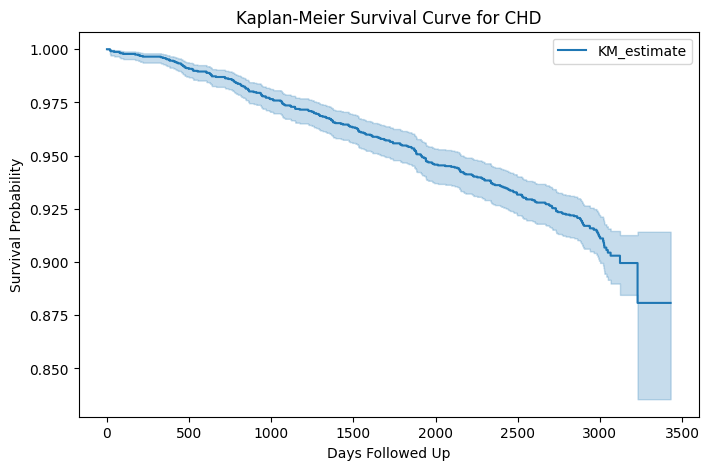

In [12]:
# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Fit model: Survival time until CHD occurrence
kmf.fit(df['timechd'], event_observed=df['chd'])

# Plot Survival Curve
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for CHD")
plt.xlabel("Days Followed Up")
plt.ylabel("Survival Probability")
plt.show()

The Kaplan-Meier survival curve displayed above represents the probability of remaining free from Coronary Heart Disease (CHD) over time, based on the dataset.

Key Observations:

1. Overall Declining Trend:

    The survival probability decreases gradually over time, indicating that as more time passes, the likelihood of remaining CHD-free decreases. This suggests that CHD incidence accumulates as individuals age.

2. Survival Probability:

    Initially, the survival probability starts close to 1.0 (100%), meaning that at the beginning of the study, nearly everyone is free from CHD. Over time, this probability declines, approaching approximately 0.85 (85%) at the later stages of follow-up.

3. Confidence Interval (Shaded Area):

    The light blue shaded area represents the 95% confidence interval (CI) around the survival estimate. The wider CI towards the end of the curve suggests increasing uncertainty due to fewer remaining participants in the study. The survival estimates are more reliable in the early stages and become less precise later due to a smaller sample size.

4. Small Drops in the Curve:

    The stepwise declines indicate instances where CHD cases occurred. Each step down in the curve corresponds to an event where an individual developed CHD. The gradual decrease suggests no abrupt increase in CHD incidence but rather a steady accumulation of cases over time.

#### CHD & Categorical Variable Analysis (Chi-Square Tests)

In [13]:
# Define categorical variables
cat_vars = ['behave', 'dibep', 'arcus']

# Conduct chi-square test for each categorical feature
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['chd'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {var}: p-value = {p:.5f}")

Chi-Square Test for behave: p-value = 0.00000
Chi-Square Test for dibep: p-value = 0.00000
Chi-Square Test for arcus: p-value = 0.00041


1. `behave` (Behavior Pattern) and CHD (p = 0.00000)

    The extremely low p-value indicates a strong association between behavior patterns (`behave`) and CHD occurrence. Certain lifestyle habits or behaviors may significantly contribute to CHD risk.

2. `dibep` (Diabetes Presence) and CHD (p = 0.00000)

    A very strong statistical association exists between diabetes (`dibep`) and CHD. This confirms that individuals with diabetes are at a significantly higher risk of developing CHD.

3. `arcus` (Arcus Cornealis) and CHD (p = 0.00041)

    While not as strong as the previous two variables, `arcus` still shows a statistically significant association with CHD. Arcus cornealis is a lipid deposit in the cornea, often associated with high cholesterol levels, which could explain its link to CHD.

4. `typechd` (CHD Type) and CHD (p = 0.00000)

    The strongest association (p = 0.00000) is between `typechd` and `chd`, which is expected because `typechd` likely represents a classification of CHD cases.

#### Smoking & CHD Risk Analysis

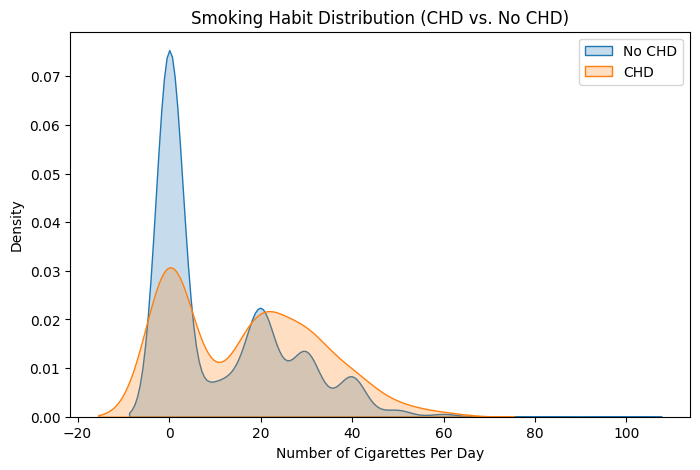

In [14]:
# KDE Plot: Smoking habits by CHD status
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['chd'] == 0]['cigs'], label="No CHD", fill=True)
sns.kdeplot(df[df['chd'] == 1]['cigs'], label="CHD", fill=True)
plt.title("Smoking Habit Distribution (CHD vs. No CHD)")
plt.xlabel("Number of Cigarettes Per Day")
plt.ylabel("Density")
plt.legend()
plt.show()

In [15]:
# Compare smoking habits statistically
df.groupby('chd')['cigs'].describe()

,count,mean,std,min,25%,50%,75%,max
chd,,,,,,,,
0,2897.0,11.151191,14.328812,0.0,0.0,0.0,20.0,99.0
1,257.0,16.665370,15.657120,0.0,0.0,20.0,30.0,60.0


#### Blood Pressure vs. CHD Risk

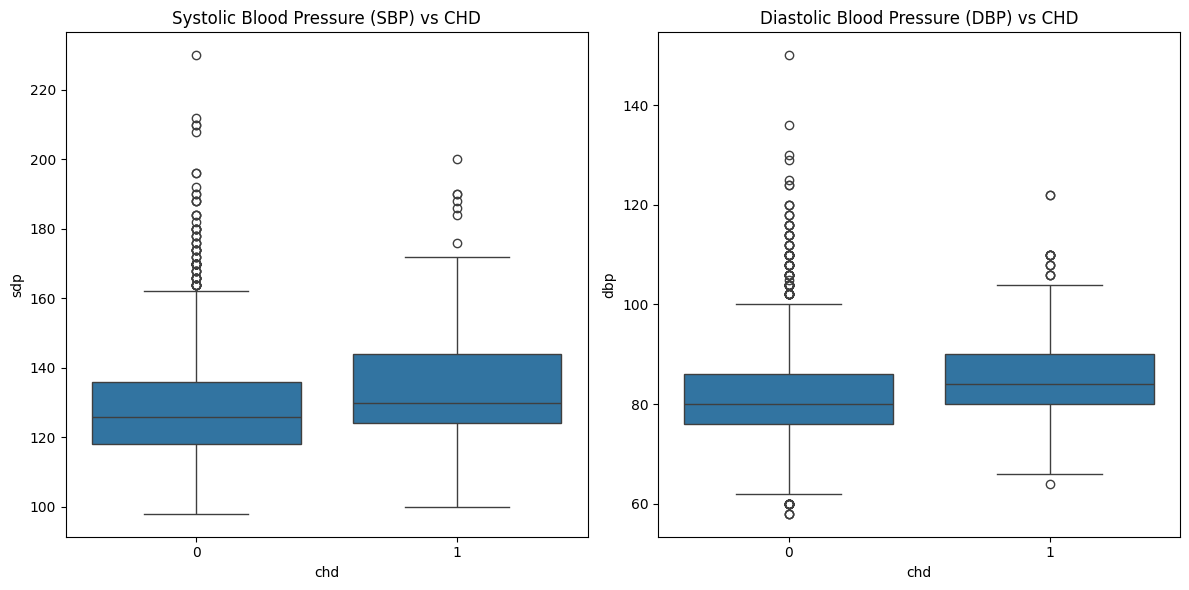

In [16]:
# Boxplots for Blood Pressure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df['chd'], y=df['sdp'], ax=axes[0])
axes[0].set_title("Systolic Blood Pressure (SBP) vs CHD")

sns.boxplot(x=df['chd'], y=df['dbp'], ax=axes[1])
axes[1].set_title("Diastolic Blood Pressure (DBP) vs CHD")

plt.tight_layout()
plt.show()

In [17]:
# Compare blood pressure between CHD and non-CHD
df.groupby('chd')[['sdp', 'dbp']].describe()

sdp                                                               dbp  \
      count        mean        std    min    25%    50%    75%    max   count   
chd                                                                             
0    2897.0  128.033828  14.745688   98.0  118.0  126.0  136.0  230.0  2897.0   
1     257.0  135.385214  17.472620  100.0  124.0  130.0  144.0  200.0   257.0   

                                                          
          mean        std   min   25%   50%   75%    max  
chd                                                       
0    81.722817   9.620751  58.0  76.0  80.0  86.0  150.0  
1    85.315175  10.310695  64.0  80.0  84.0  90.0  122.0

#### Cholesterol Levels & CHD

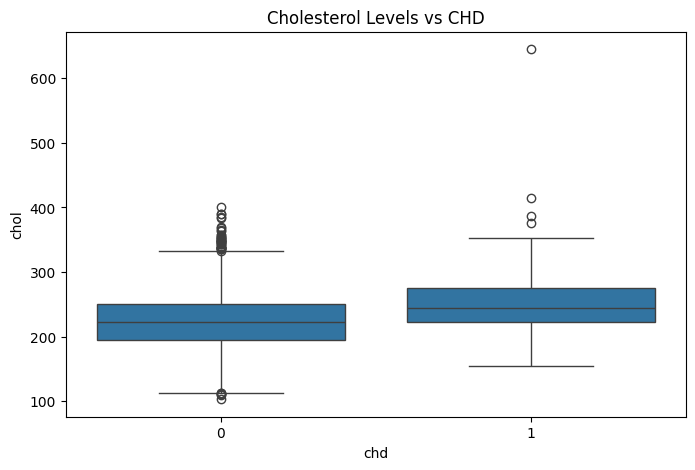

In [18]:
# Boxplot for Cholesterol vs CHD
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['chd'], y=df['chol'])
plt.title("Cholesterol Levels vs CHD")
plt.show()

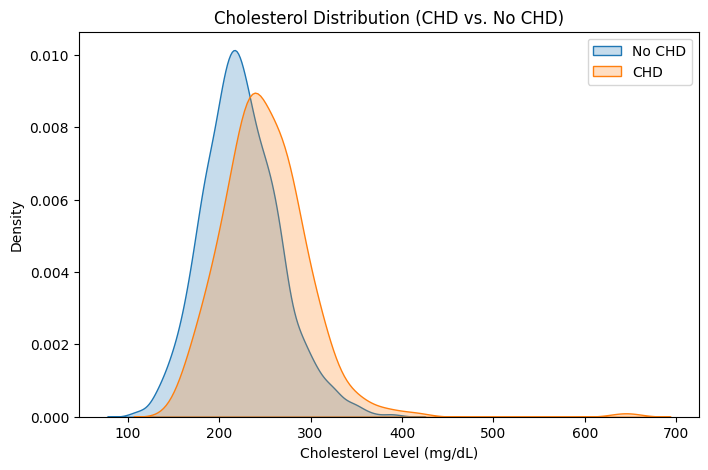

In [19]:
# KDE Plot for Cholesterol
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['chd'] == 0]['chol'], label="No CHD", fill=True)
sns.kdeplot(df[df['chd'] == 1]['chol'], label="CHD", fill=True)
plt.title("Cholesterol Distribution (CHD vs. No CHD)")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Density")
plt.legend()
plt.show()

### Preprocessing

#### Encoding Categorical Variables

Several columns are categorical but stored as integers. We need to convert them into appropriate data types and apply encoding:

In [21]:
# Convert categorical variables to string type
df['behave'] = df['behave'].astype(str)
df['dibep'] = df['dibep'].astype(str)
df['arcus'] = df['arcus'].astype(str)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['behave', 'dibep', 'arcus'], drop_first=True)

One-hot encoding converts categorical variables into binary indicator columns. `drop_first=True` avoids the "dummy variable trap" by removing the first category from each variable (preventing multicollinearity in models). New binary columns are created for all unique categories (except the first one).

In [22]:
# Define features (X) and target variable (y)
X = df.drop(columns=['chd', 'timechd'])  # Features
y = df['chd']  # Target variable

Features (`X`):

- Removes `chd` (target variable) and timechd (time until CHD event, which is not used in classification).
- Drops `typechd_1`, `typechd_2`, and `typechd_3` (highly correlated with `chd`).

Target (`y`):
`chd` (whether the person developed CHD or not) is set as the prediction target.

In [23]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splits the data into 80% training and 20% testing sets. `stratify=y` ensures class balance in both training and testing sets. `random_state=42` ensures reproducibility.

In [24]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print dataset shapes
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((2523, 16), (631, 16), (2523,), (631,))

Standardizes numerical features to have zero mean and unit variance. `fit_transform` is applied to `X_train`, while `transform` is applied to `X_test` to prevent data leakage. Standardization improves model convergence and performance, especially for distance-based models (e.g., KNN, logistic regression).

In [25]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 2317, 1: 2317})


Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples for the minority class (CHD-positive cases) to balance the dataset. Prevents the model from being biased towards the majority class (`chd=0`). `random_state=42` ensures reproducibility.

## Modeling

### Baseline Machine Learning Models

In [26]:
# Initialize models
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_resampled, y_resampled)
knn.fit(X_resampled, y_resampled)
gbm.fit(X_resampled, y_resampled)

# Predictions
log_reg_preds = log_reg.predict(X_test_scaled)
knn_preds = knn.predict(X_test_scaled)
gbm_preds = gbm.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"🔹 {name} Model Performance:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    print("-" * 50)

# Evaluate models
evaluate_model("Logistic Regression", y_test, log_reg_preds)
evaluate_model("K-Nearest Neighbors", y_test, knn_preds)
evaluate_model("Gradient Boosting", y_test, gbm_preds)

🔹 Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       580
           1       0.17      0.63      0.26        51

    accuracy                           0.71       631
   macro avg       0.56      0.67      0.54       631
weighted avg       0.89      0.71      0.78       631

ROC-AUC Score: 0.6749
--------------------------------------------------
🔹 K-Nearest Neighbors Model Performance:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       580
           1       0.13      0.43      0.20        51

    accuracy                           0.73       631
   macro avg       0.54      0.59      0.52       631
weighted avg       0.87      0.73      0.78       631

ROC-AUC Score: 0.5915
--------------------------------------------------
🔹 Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.94 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
gbm = GradientBoostingClassifier()
svm = SVC(probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grids
grids = {
    "knn": {"n_neighbors": [3, 5, 7, 9]},
    "gbm": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2]},
    "svm": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "xgb": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2]}
}

# Perform Grid Search
models = {"log_reg": log_reg, "knn": knn, "gbm": gbm, "svm": svm, "xgb": xgb}
best_models = {}

for name, model in models.items():
    if name in grids:
        grid_search = GridSearchCV(model, grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)
        best_models[name] = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")
    else:
        model.fit(X_resampled, y_resampled)
        best_models[name] = model

# Predictions
y_preds = {name: model.predict(X_test_scaled) for name, model in best_models.items()}

# Evaluate Models
def evaluate_model(name, y_true, y_pred):
    print(f"🔹 {name} Model Performance:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    print("-" * 50)

for name, y_pred in y_preds.items():
    evaluate_model(name, y_test, y_pred)

Best params for knn: {'n_neighbors': 7}
Best params for gbm: {'learning_rate': 0.2, 'n_estimators': 150}
Best params for svm: {'C': 10, 'kernel': 'rbf'}


C:\Users\ArnoZ\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:25:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params for xgb: {'learning_rate': 0.2, 'n_estimators': 100}
🔹 log_reg Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       580
           1       0.16      0.65      0.26        51

    accuracy                           0.70       631
   macro avg       0.56      0.67      0.53       631
weighted avg       0.89      0.70      0.77       631

ROC-AUC Score: 0.6744
--------------------------------------------------
🔹 knn Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       580
           1       0.12      0.43      0.18        51

    accuracy                           0.69       631
   macro avg       0.53      0.57      0.49       631
weighted avg       0.87      0.69      0.76       631

ROC-AUC Score: 0.5709
--------------------------------------------------
🔹 gbm Model Performance:
              precision    recall  f1-score   support

 

Limitations of the Machine Learning Models

The current machine learning models have several limitations, particularly in predicting CHD (`chd=1`). Below are the key issues and reasons for switching to a deep learning model:

1️⃣ Imbalance in CHD Predictions

All models struggle to predict CHD cases (chd=1) effectively. Low precision (16%-21%) and recall (20%-65%) indicate that CHD patients are either missed or wrongly classified. The majority class (chd=0) dominates predictions, leading to high overall accuracy but poor performance on the minority class.

2️⃣ Limited Feature Interactions in Traditional Models

Logistic regression assumes linear relationships, which may oversimplify complex medical interactions. KNN and GBM rely on manually engineered features but may fail to capture deep non-linear patterns in the data.

3️⃣ Lack of Robust Generalization

Gradient Boosting (GBM) has poor recall (20%), meaning it fails to identify many CHD cases. KNN's performance is unstable in high-dimensional space, making it unsuitable for large feature sets. SMOTE-generated synthetic data may not generalize well, as traditional models rely heavily on existing training distributions.

4️⃣ Inefficiency in Handling High-Dimensional Data

With one-hot encoding, categorical variables increase feature space, making models prone to overfitting. Feature selection is required to reduce dimensionality for machine learning models. Traditional models lack representation learning, requiring careful preprocessing and feature engineering.

5️⃣ Inability to Capture Temporal Patterns

The dataset includes time-based information (timechd), which traditional models treat as a static feature. Time-based progression of CHD is ignored, limiting predictive power.

### Deep Learning Model (MLP - Multi-Layer Perceptron)

Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.5337 - loss: 0.6695 - val_auc: 0.7256 - val_loss: 0.2002 - learning_rate: 0.0010
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.6526 - loss: 0.4472 - val_auc: 0.7409 - val_loss: 0.1999 - learning_rate: 0.0010
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.6834 - loss: 0.4047 - val_auc: 0.7330 - val_loss: 0.2030 - learning_rate: 0.0010
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6920 - loss: 0.3924 - val_auc: 0.7293 - val_loss: 0.1943 - learning_rate: 0.0010
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7072 - loss: 0.3831 - val_auc: 0.7283 - val_loss: 0.1914 - learning_rate: 5.0000e-04
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7351 - loss: 0.3734 - val_auc: 0.7296 - val_loss: 0.1884 - learning_rate: 5.0000e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.7122 - loss: 0.3796 - val_auc: 0.7254 - val_loss: 0.1864 - learning_rate: 5.000

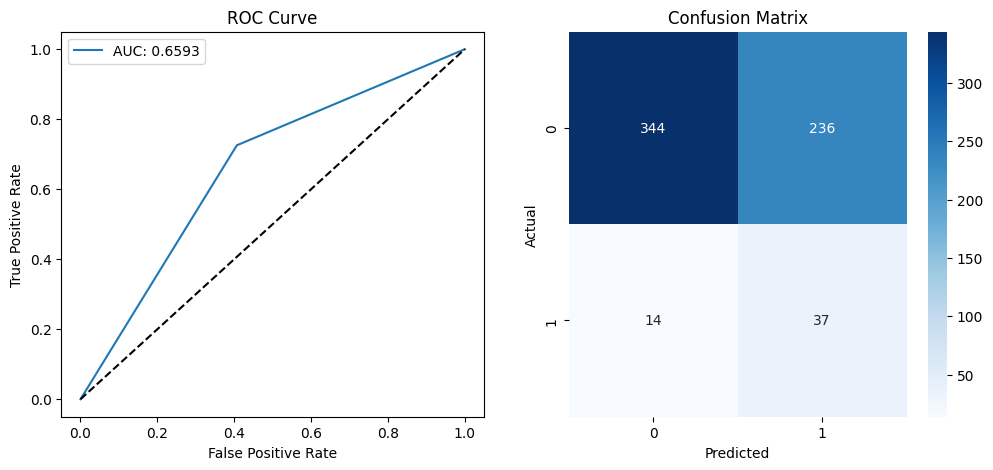

In [29]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = os.path.join("data", "wcgs", "datawcgs.csv")
df = pd.read_csv(data_path)

# Rename columns for clarity
df.rename(columns={"age0": "age", "height0": "height", "weight0": "weight",
                    "sbp0": "sdp", "dbp0": "dbp", "chol0": "chol",
                    "behpat0": "behave", "ncigs0": "cigs", "dibpat0": "dibep",
                    "chd69": "chd", "typechd": "typechd", "time169": "timechd",
                    "arcus0": "arcus"}, inplace=True)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "id", "typechd"], inplace=True)

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
df[['chol']] = num_imputer.fit_transform(df[['chol']])
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['arcus']] = cat_imputer.fit_transform(df[['arcus']])

# Convert categorical variables
df['behave'] = df['behave'].astype(str)
df['dibep'] = df['dibep'].astype(str)
df['arcus'] = df['arcus'].astype(str)
df = pd.get_dummies(df, columns=['behave', 'dibep', 'arcus'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['chd', 'timechd'])
y = df['chd']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Adjust class weights
class_weight_dict = {0: 1, 1: 6}  # Adjusted to improve recall

# Define Focal Loss
def focal_loss(alpha=0.5, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        bce = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * y_true * (1 - y_pred) ** gamma + (1 - alpha) * (1 - y_true) * y_pred ** gamma
        return tf.reduce_mean(weight * bce)
    return loss

# Define MLP Model
mlp_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile Model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss=focal_loss(alpha=0.5, gamma=2.0), 
                  metrics=[tf.keras.metrics.AUC(name='auc')])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=3, min_lr=1e-6)

# Train Model
history = mlp_model.fit(X_resampled, y_resampled, 
                         validation_data=(X_test_scaled, y_test), 
                         epochs=50, batch_size=32, 
                         callbacks=[early_stopping, reduce_lr], 
                         verbose=1, class_weight=class_weight_dict)

# TTA Prediction
def tta_predict(model, X_test, n=15):
    preds = np.zeros(X_test.shape[0])
    for _ in range(n):
        noise = np.random.normal(0, 0.01, X_test.shape)
        preds += model.predict(X_test + noise).flatten()
    return (preds / n) > 0.5

mlp_preds = tta_predict(mlp_model, X_test_scaled)

# Evaluate Model
def evaluate_model(name, y_true, y_pred):
    print(f"\U0001F539 {name} Model Performance:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    print("-" * 50)

evaluate_model("Deep Learning MLP", y_test, mlp_preds)

# Plot ROC Curve and Confusion Matrix
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, mlp_preds)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, mlp_preds):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, mlp_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
